In [232]:
import pandas as pd
df=pd.read_csv('Titanic_ISTE.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,1,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN


In [233]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17'],
      dtype='object')

In [234]:
df.dtypes #to get the data type of the column

PassengerId      int64
Survived       float64
Pclass         float64
Name            object
Sex             object
Age            float64
SibSp          float64
Parch          float64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Unnamed: 12    float64
Unnamed: 13    float64
Unnamed: 14    float64
Unnamed: 15    float64
Unnamed: 16    float64
Unnamed: 17    float64
dtype: object

### 1.Find  how much the output is dependent on each features using

## a. Correlation

In [235]:
col1=df['Survived']#output column
col2=df['Pclass']
correlation=col2.corr(col1)#calculate correlation between `column_1` and `column_2`
print("Pclass:"+str(correlation))


Pclass:-0.34123611997757003


In [236]:
col2=df['Age']
correlation1=col2.corr(col1)
print("Age:"+str(correlation1))


Age:-0.07885930007180811


In [237]:
col2=df['SibSp']
correlation1=col2.corr(col1)
print("SibSp:"+str(correlation1))


SibSp:-0.03476026217335815


In [238]:
col2=df['Parch']
correlation1=col2.corr(col1)
print("Parch:"+str(correlation1))


Parch:0.08177609101276331


In [239]:
col2=df['Fare']
correlation1=col2.corr(col1)
print("Fare:"+str(correlation1))

Fare:0.2590131520302958


## b. Chi Square

the absolute value of correlation closer to 1 means they are dependent while closer to 0 means they dont have any relationship/dependency

In [240]:
CrosstabResult=pd.crosstab(index=df['Pclass'],columns=df['Survived'])
print(CrosstabResult)

# importing the required function
from scipy.stats import chi2_contingency

# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)

# P-Value is the Probability of H0 being True
# If P-Value>0.05 then only we Accept the assumption(H0)

print('The P-Value of the ChiSq Test is:', ChiSqResult[1])


Survived  0.0  1.0
Pclass            
1.0        80  136
2.0        97   87
3.0       371  117
The P-Value of the ChiSq Test is: 2.2842186475599623e-23


In [241]:
CrosstabResult=pd.crosstab(index=df['Age'],columns=df['Survived'])
print(CrosstabResult)

ChiSqResult = chi2_contingency(CrosstabResult)
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

Survived  0.0  1.0
Age               
0.42        0    1
0.67        0    1
0.75        0    2
0.83        0    2
0.92        0    1
...       ...  ...
70.00       2    0
70.50       1    0
71.00       2    0
74.00       1    0
80.00       0    1

[88 rows x 2 columns]
The P-Value of the ChiSq Test is: 0.08371525224381583


In [242]:
CrosstabResult=pd.crosstab(index=df['SibSp'],columns=df['Survived'])
print(CrosstabResult)

ChiSqResult = chi2_contingency(CrosstabResult)
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

Survived  0.0  1.0
SibSp             
0.0       398  209
1.0        97  112
2.0        15   13
3.0        12    3
4.0        15    3
5.0         4    0
8.0         7    0
The P-Value of the ChiSq Test is: 1.2168985272205909e-06


In [243]:
CrosstabResult=pd.crosstab(index=df['Parch'],columns=df['Survived'])
print(CrosstabResult)

ChiSqResult = chi2_contingency(CrosstabResult)
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

Survived  0.0  1.0
Parch             
0.0       444  231
1.0        53   64
2.0        40   40
3.0         2    3
4.0         4    0
5.0         4    1
6.0         1    0
The P-Value of the ChiSq Test is: 0.00011516516080127263


In [244]:
CrosstabResult=pd.crosstab(index=df['Fare'],columns=df['Survived'])
print(CrosstabResult)

ChiSqResult = chi2_contingency(CrosstabResult)
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

Survived  0.0  1.0
Fare              
0.0000     14    1
4.0125      1    0
5.0000      1    0
6.2375      1    0
6.4375      1    0
...       ...  ...
227.5250    1    3
247.5208    1    1
262.3750    0    2
263.0000    2    2
512.3292    0    3

[248 rows x 2 columns]
The P-Value of the ChiSq Test is: 8.966050015695972e-12


### 2. Perform necessary operation for avoid missing values in data  for each column .state reason for your selection of the particular operation.

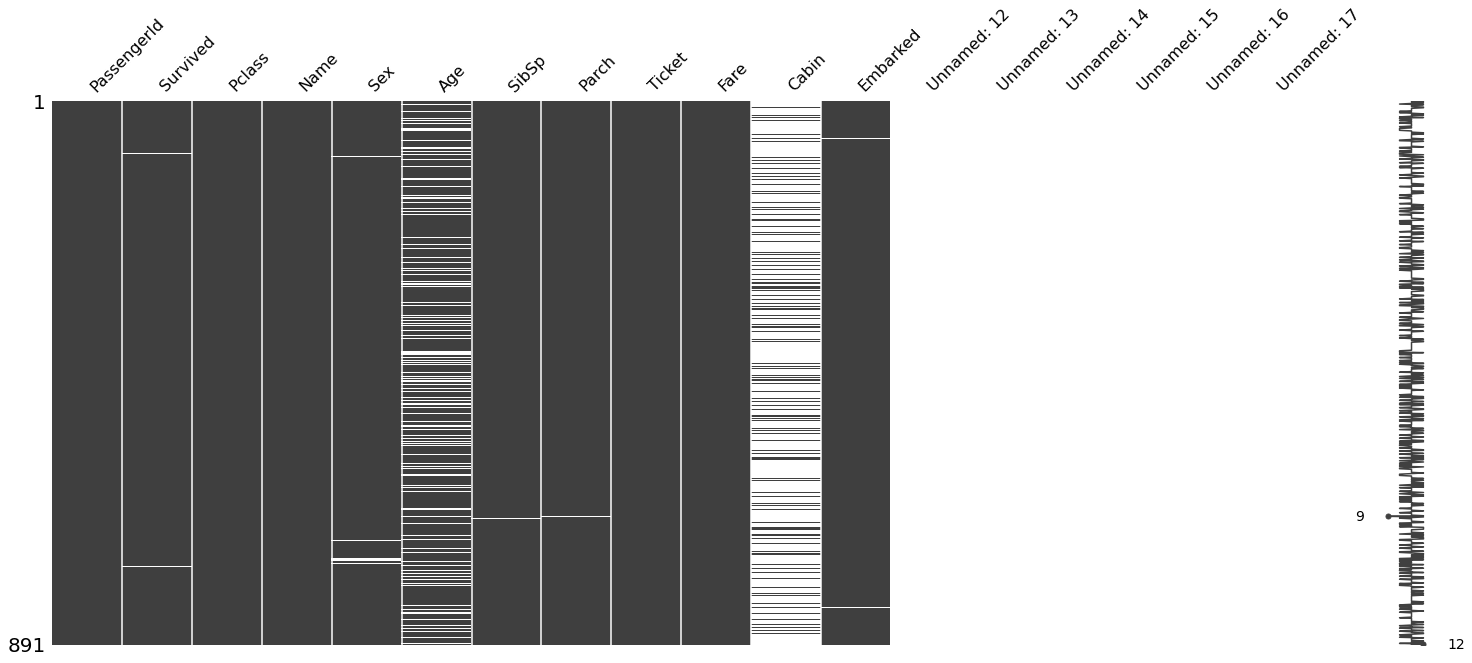

In [245]:
import missingno as msno
msno.matrix(df)

In [246]:
column_names = df.columns
for column in column_names:
    print(column + ' - ' + str(df[column].isnull().sum()))

PassengerId - 0
Survived - 2
Pclass - 1
Name - 0
Sex - 10
Age - 179
SibSp - 1
Parch - 2
Ticket - 0
Fare - 0
Cabin - 687
Embarked - 2
Unnamed: 12 - 891
Unnamed: 13 - 891
Unnamed: 14 - 891
Unnamed: 15 - 891
Unnamed: 16 - 891
Unnamed: 17 - 890


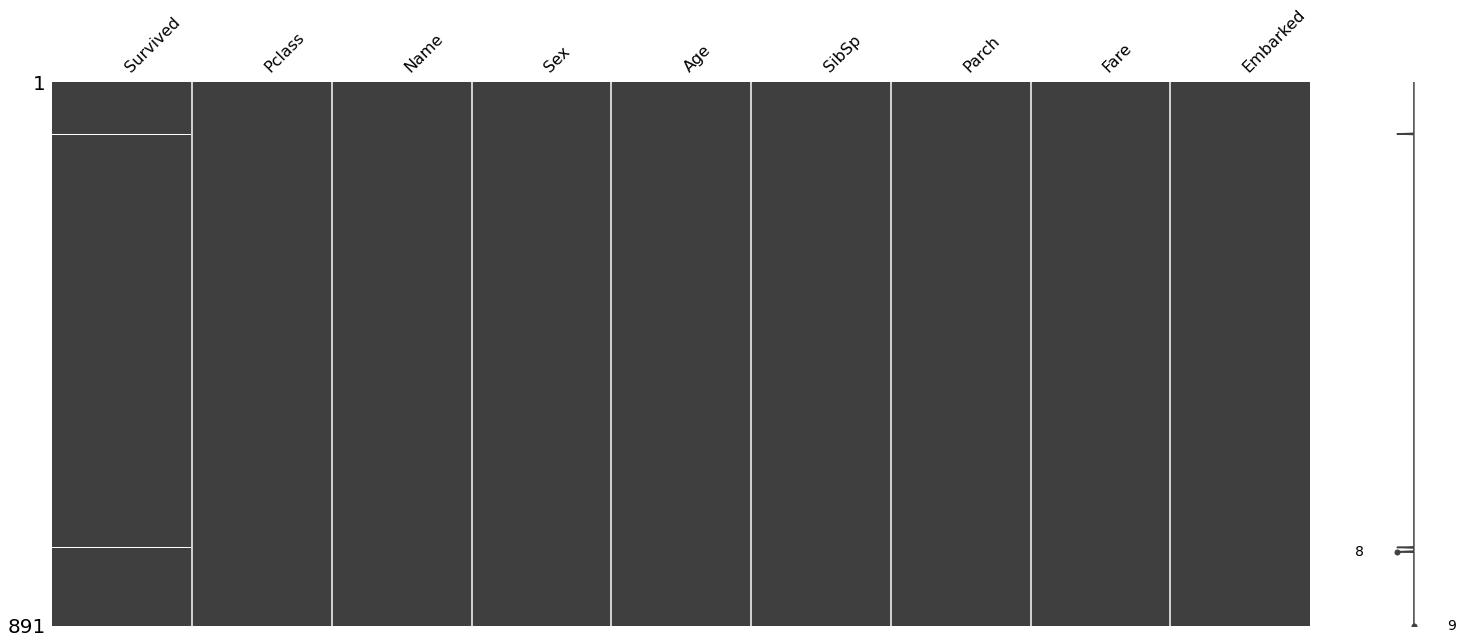

In [247]:
import numpy as np
#rplacing null values with using mode or mean or median
df['Sex'].fillna(df['Sex'].mode()[0], inplace=True)
df["Age"] = df["Age"].replace(np.NaN, df["Age"].mean())
df['SibSp'].fillna(df['SibSp'].mode()[0], inplace=True)
df['Parch'].fillna(df['Parch'].mode()[0], inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
#dropping columns that are not required
df.drop(columns=['PassengerId'],inplace=True)
df.drop(columns=['Ticket'],inplace=True)
df.drop(columns=['Cabin'],inplace=True)
df.drop(columns=['Unnamed: 12'],inplace=True)
df.drop(columns=['Unnamed: 13'],inplace=True)
df.drop(columns=['Unnamed: 14'],inplace=True)
df.drop(columns=['Unnamed: 15'],inplace=True)
df.drop(columns=['Unnamed: 16'],inplace=True)
df.drop(columns=['Unnamed: 17'],inplace=True)

msno.matrix(df)


### 3. Perform categorical encoding.

In [248]:
#categorical encoding
import category_encoders as ce
encoder=ce.OrdinalEncoder(cols=['Sex'],return_df=True,mapping=[{'col':'Sex',
'mapping':{'male':0,'female':1}}])
df_transformed=encoder.fit_transform(df)
print(df_transformed)


     Survived  Pclass                                               Name  Sex  \
0         0.0     3.0                            Braund, Mr. Owen Harris    0   
1         1.0     1.0  Cumings, Mrs. John Bradley (Florence Briggs Th...    1   
2         1.0     3.0                             Heikkinen, Miss. Laina    1   
3         1.0     1.0       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1   
4         0.0     3.0                           Allen, Mr. William Henry    0   
..        ...     ...                                                ...  ...   
886       0.0     2.0                              Montvila, Rev. Juozas    0   
887       1.0     1.0                       Graham, Miss. Margaret Edith    1   
888       0.0     3.0           Johnston, Miss. Catherine Helen "Carrie"    1   
889       1.0     1.0                              Behr, Mr. Karl Howell    0   
890       0.0     3.0                                Dooley, Mr. Patrick    0   

           Age  SibSp  Parc

In [249]:
encoder=ce.OrdinalEncoder(cols=['Embarked'],return_df=True,mapping=[{'col':'Embarked',
'mapping':{'C':0, 'Q':1, 'S':2}}])
df_transformed1=encoder.fit_transform(df_transformed)
print(df_transformed1)


     Survived  Pclass                                               Name  Sex  \
0         0.0     3.0                            Braund, Mr. Owen Harris    0   
1         1.0     1.0  Cumings, Mrs. John Bradley (Florence Briggs Th...    1   
2         1.0     3.0                             Heikkinen, Miss. Laina    1   
3         1.0     1.0       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1   
4         0.0     3.0                           Allen, Mr. William Henry    0   
..        ...     ...                                                ...  ...   
886       0.0     2.0                              Montvila, Rev. Juozas    0   
887       1.0     1.0                       Graham, Miss. Margaret Edith    1   
888       0.0     3.0           Johnston, Miss. Catherine Helen "Carrie"    1   
889       1.0     1.0                              Behr, Mr. Karl Howell    0   
890       0.0     3.0                                Dooley, Mr. Patrick    0   

           Age  SibSp  Parc

### 4. Perform  feature scaling .

In [250]:
#feature Scaling
from sklearn.preprocessing import StandardScaler
X = df_transformed1.iloc[:, :].values

sc = StandardScaler()
X[:,3:] = sc.fit_transform(X[:,3:])

In [251]:
print(X)

[[0.0 3.0 'Braund, Mr. Owen Harris' ... -0.4723776458415312
  -0.5024451714361923 0.5859541426526597]
 [1.0 1.0 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)' ...
  -0.4723776458415312 0.7868452935884461 -1.942303199253005]
 [1.0 3.0 'Heikkinen, Miss. Laina' ... -0.4723776458415312
  -0.4888542575852486 0.5859541426526597]
 ...
 [0.0 3.0 'Johnston, Miss. Catherine Helen "Carrie"' ...
  2.0107402446882876 -0.17626323901354432 0.5859541426526597]
 [1.0 1.0 'Behr, Mr. Karl Howell' ... -0.4723776458415312
  -0.04438103794142432 -1.942303199253005]
 [0.0 3.0 'Dooley, Mr. Patrick' ... -0.4723776458415312
  -0.49237782784290063 -0.6781745283001727]]
